In [1]:
install.packages("tidyquant")
install.packages("PerformanceAnalytics")


The downloaded binary packages are in
	/var/folders/23/2pq3q16d1nn_mvwz51ct825w0000gq/T//RtmpP05jwS/downloaded_packages

The downloaded binary packages are in
	/var/folders/23/2pq3q16d1nn_mvwz51ct825w0000gq/T//RtmpP05jwS/downloaded_packages


In [19]:
# --- 步骤 1: 加载必要的 R 包 ---
library(tidyquant)
library(PerformanceAnalytics)
library(dplyr)

# --- 步骤 2: 定义分析参数 ---
ticker_symbol     <- "QQQ"
start_date        <- "2023-01-01"
end_date          <- Sys.Date()
annual_risk_free_rate <- 0.02  # 年化无风险利率 (2%)
trading_days_per_year <- 252   # 年化因子


# 将年化无风险利率转换为日度无风险利率，以匹配我们的日度回报率数据
daily_risk_free_rate <- annual_risk_free_rate / trading_days_per_year


# --- 步骤 3: 从雅虎财经获取历史价格数据 ---
cat("--- 正在下载 ", ticker_symbol, " 从 ", start_date, " 到 ", format(end_date, "%Y-%m-%d"), " 的数据... ---\n")
qqq_prices <- tq_get(ticker_symbol, 
                     from = start_date, 
                     to = end_date)

print(head(qqq_prices))
print(tail(qqq_prices))

# --- 步骤 4: 计算每日回报率 ---
cat("\n--- 正在计算每日对数回报率... ---\n")
qqq_returns <- qqq_prices %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "daily", 
               type       = "log",
               col_rename = "log.returns")

# --- 步骤 5: 将数据转换为 XTS 格式 ---
cat("\n--- 正在将数据框转换为 XTS 时间序列对象... ---\n")
qqq_returns_xts <- tk_xts(qqq_returns, 
                          select   = log.returns, 
                          date_var = date)
print(qqq_returns_xts)
# --- 步骤 6: 计算年化夏普比率 ---
cat("\n--- 正在计算年化夏普比率 (年化无风险利率 = ", annual_risk_free_rate * 100, "%)... ---\n")
annualized_sharpe_ratio <- SharpeRatio.annualized(qqq_returns_xts, 
                                                  Rf = daily_risk_free_rate, # 使用正确的日度利率
                                                  scale = trading_days_per_year)

# --- 步骤 7: 打印最终结果 ---
cat("\n======================================================\n")
cat("                最终分析结果\n")
cat("======================================================\n")
print(paste("分析标的:", ticker_symbol))
print(paste("时间范围:", start_date, "至", format(end_date, "%Y-%m-%d")))
print(paste("年化无风险利率:", annual_risk_free_rate * 100, "%"))
cat("------------------------------------------------------\n")
print(annualized_sharpe_ratio)
cat("======================================================\n")

--- 正在下载  QQQ  从  2023-01-01  到  2025-08-20  的数据... ---
# A tibble: 6 × 8
  symbol date        open  high   low close   volume adjusted
  <chr>  <date>     <dbl> <dbl> <dbl> <dbl>    <dbl>    <dbl>
1 QQQ    2023-01-03  269.  270.  262.  264. 42335300     260.
2 QQQ    2023-01-04  267.  267.  263.  266. 47754900     262.
3 QQQ    2023-01-05  264.  264.  261.  262. 45396700     258.
4 QQQ    2023-01-06  263.  270.  260.  269. 54659700     265.
5 QQQ    2023-01-09  271.  275.  270.  271. 45568700     266.
6 QQQ    2023-01-10  269.  273.  269.  273. 35247800     269.
# A tibble: 6 × 8
  symbol date        open  high   low close   volume adjusted
  <chr>  <date>     <dbl> <dbl> <dbl> <dbl>    <dbl>    <dbl>
1 QQQ    2025-08-12  575.  580.  572.  580. 42143300     580.
2 QQQ    2025-08-13  583.  583.  579.  580. 41209300     580.
3 QQQ    2025-08-14  578.  582.  578.  580. 45425000     580.
4 QQQ    2025-08-15  580.  580.  576.  577. 49480200     577.
5 QQQ    2025-08-18  576.  578.  575.  5

### 接下来做什么？解读 1.44 的意义

现在我们有了这个可靠的数字，我们可以来解读它了！

* 夏普比率是什么？ 它衡量的是“风险调整后回报”。简单来说，它回答了这样一个问题：“我每承担一单位的风险（波动性），能获得多少超越无风险利率的回报？”
* 1.44 是好是坏？
  - 夏普比率 > 1 通常被认为是良好的。
  - 夏普比率 > 2 通常被认为是非常好的。
  - 夏普比率 > 3 通常被认为是卓越的。

所以，在 2023-01-01 至 2025-08-20 这个时间段内，QQQ 表现出了良好的风险调整后回报。

In [25]:
library(showtext) 
library(sysfonts)

font_add_google("Noto Sans SC", "NotoSansSC") # 从 Google Fonts 下载并添加思源黑体（简体中文）
showtext_auto()
theme_set(theme_minimal(base_family = "NotoSansSC", base_size = 12)) 

### 获取 A 股数据


* 上海证券交易所 (Shanghai Stock Exchange): 在 6 位代码后加上 `.SS`
* 深圳证券交易所 (Shenzhen Stock Exchange): 在 6 位代码后加上 `.SZ`


--- 正在从雅虎财经下载 A 股数据... ---
# A tibble: 6 × 8
  symbol    date        open  high   low close  volume adjusted
  <chr>     <date>     <dbl> <dbl> <dbl> <dbl>   <dbl>    <dbl>
1 600519.SS 2023-01-03 1731. 1738. 1706. 1730. 2603380    1612.
2 600519.SS 2023-01-04 1730  1739. 1716  1725. 2041575    1607.
3 600519.SS 2023-01-05 1737  1801  1733  1801  4794285    1678.
4 600519.SS 2023-01-06 1806. 1812. 1787  1804. 2490375    1681.
5 600519.SS 2023-01-09 1835  1850. 1808. 1841. 3097723    1715.
6 600519.SS 2023-01-10 1839. 1864. 1830. 1854. 2273173    1728.
# A tibble: 6 × 8
  symbol    date        open  high   low close   volume adjusted
  <chr>     <date>     <dbl> <dbl> <dbl> <dbl>    <dbl>    <dbl>
1 000858.SZ 2025-08-12  124.  125.  123.  123. 21137375     123.
2 000858.SZ 2025-08-13  123.  123.  123.  123. 15582285     123.
3 000858.SZ 2025-08-14  123.  125.  123.  123. 19906336     123.
4 000858.SZ 2025-08-15  123.  123.  122.  123. 19394317     123.
5 000858.SZ 2025-08-18  123.  125. 

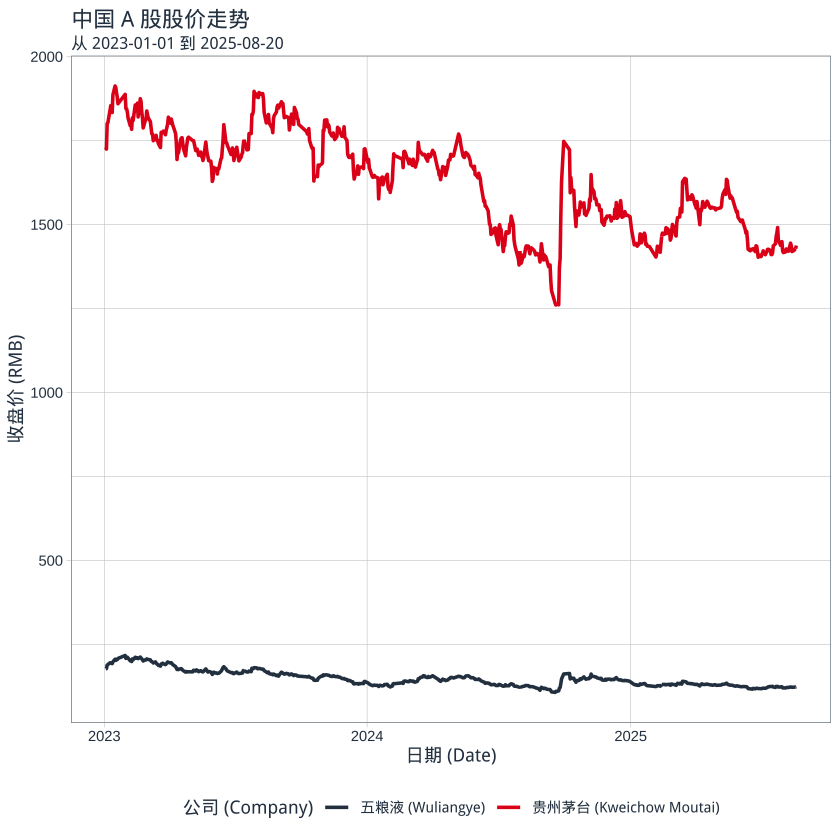

In [23]:
# 加载必要的包
library(tidyquant)
library(ggplot2)
library(dplyr)

# 定义我们要获取的 A 股股票代码 (使用雅虎财经格式)
a_share_tickers <- c("600519.SS", "000858.SZ")

# 定义时间范围
start_date <- "2023-01-01"
end_date <- Sys.Date()

# 使用 tq_get() 获取数据
cat("--- 正在从雅虎财经下载 A 股数据... ---\n")
a_share_prices <- tq_get(a_share_tickers,
                         from = start_date,
                         to = end_date)

# 查看一下下载的数据结构
print(head(a_share_prices))
print(tail(a_share_prices))

# 使用 ggplot2 可视化收盘价走势
cat("\n--- 正在生成股价走势图... ---\n")
a_share_prices %>%
  # 我们给股票代码起个更友好的名字
  mutate(company = case_when(
    symbol == "600519.SS" ~ "贵州茅台 (Kweichow Moutai)",
    symbol == "000858.SZ" ~ "五粮液 (Wuliangye)",
    TRUE ~ symbol
  )) %>%
  ggplot(aes(x = date, y = close, color = company)) +
  geom_line(linewidth = 1) +
  labs(
    title = "中国 A 股股价走势",
    subtitle = paste("从", start_date, "到", format(end_date, "%Y-%m-%d")),
    x = "日期 (Date)",
    y = "收盘价 (RMB)",
    color = "公司 (Company)"
  ) +
  theme_tq() +
  scale_color_tq()

## 获取 A 股大盘指数


* 上证综合指数 (SSE Composite Index): `000001.SS`
* 深证成份指数 (SZSE Component Index): `399001.SZ`
* 沪深300指数 (CSI 300 Index): `000300.SS`


In [34]:
shanghai_composite <- tq_get("000300.SS", from = "2023-01-01")
print(head(shanghai_composite))
print(tail(shanghai_composite))

# A tibble: 6 × 8
  symbol    date        open  high   low close volume adjusted
  <chr>     <date>     <dbl> <dbl> <dbl> <dbl>  <dbl>    <dbl>
1 000300.SS 2023-01-03 3865. 3894. 3831. 3888. 115100    3888.
2 000300.SS 2023-01-04 3886. 3906. 3874. 3893. 110700    3893.
3 000300.SS 2023-01-05 3913. 3975. 3912. 3969. 116500    3969.
4 000300.SS 2023-01-06 3970. 4000. 3966. 3981. 111000    3981.
5 000300.SS 2023-01-09 3999. 4023. 3991. 4013. 117100    4013.
6 000300.SS 2023-01-10 4015. 4030. 4002. 4017. 101800    4017.
# A tibble: 6 × 8
  symbol    date        open  high   low close volume adjusted
  <chr>     <date>     <dbl> <dbl> <dbl> <dbl>  <dbl>    <dbl>
1 000300.SS 2025-08-12 4124. 4153. 4121. 4144. 177300    4144.
2 000300.SS 2025-08-13 4150. 4187. 4147. 4177. 213900    4177.
3 000300.SS 2025-08-14 4180. 4220. 4166. 4173. 221100    4173.
4 000300.SS 2025-08-15 4162. 4215. 4158. 4202. 261300    4202.
5 000300.SS 2025-08-18 4218. 4273. 4203. 4239. 301500    4239.
6 000300.SS 2025-08

--- 正在从雅虎财经下载 A 股数据... ---
# A tibble: 6 × 8
  symbol    date        open  high   low close volume adjusted
  <chr>     <date>     <dbl> <dbl> <dbl> <dbl>  <dbl>    <dbl>
1 000001.SS 2023-01-03 3088. 3120. 3073. 3117. 281400    3117.
2 000001.SS 2023-01-04 3118. 3129. 3109. 3124. 273300    3124.
3 000001.SS 2023-01-05 3133. 3159. 3130. 3155. 257000    3155.
4 000001.SS 2023-01-06 3155. 3171. 3152. 3158. 257400    3158.
5 000001.SS 2023-01-09 3169. 3184. 3165. 3176. 258100    3176.
6 000001.SS 2023-01-10 3178. 3178. 3165. 3170. 233000    3170.
# A tibble: 6 × 8
  symbol    date        open  high   low close volume adjusted
  <chr>     <date>     <dbl> <dbl> <dbl> <dbl>  <dbl>    <dbl>
1 000300.SS 2025-08-12 4124. 4153. 4121. 4144. 177300    4144.
2 000300.SS 2025-08-13 4150. 4187. 4147. 4177. 213900    4177.
3 000300.SS 2025-08-14 4180. 4220. 4166. 4173. 221100    4173.
4 000300.SS 2025-08-15 4162. 4215. 4158. 4202. 261300    4202.
5 000300.SS 2025-08-18 4218. 4273. 4203. 4239. 301500  

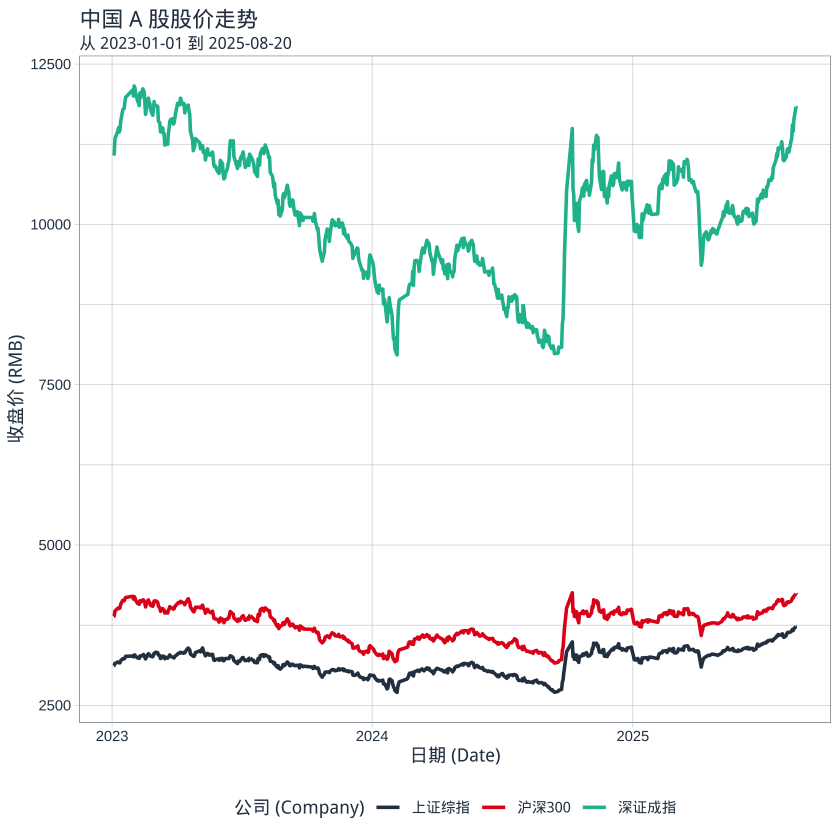

In [36]:
library(tidyquant)
library(ggplot2)
library(dplyr)

# 定义我们要获取的 A 股股票代码 (使用雅虎财经格式)
a_share_tickers <- c("000001.SS", "399001.SZ", "000300.SS")

# 定义时间范围
start_date <- "2023-01-01"
end_date <- Sys.Date()

# 使用 tq_get() 获取数据
cat("--- 正在从雅虎财经下载 A 股数据... ---\n")
a_share_prices <- tq_get(a_share_tickers,
                         from = start_date,
                         to = end_date)

# 查看一下下载的数据结构
print(head(a_share_prices))
print(tail(a_share_prices))

# 使用 ggplot2 可视化收盘价走势
cat("\n--- 正在生成股价走势图... ---\n")
a_share_prices %>%
  # 我们给股票代码起个更友好的名字
  mutate(company = case_when(
    symbol == "000001.SS" ~ "上证综指",
    symbol == "399001.SZ" ~ "深证成指",
    symbol == "000300.SS" ~ "沪深300",
    TRUE ~ symbol
  )) %>%
  ggplot(aes(x = date, y = close, color = company)) +
  geom_line(linewidth = 1) +
  labs(
    title = "中国 A 股股价走势",
    subtitle = paste("从", start_date, "到", format(end_date, "%Y-%m-%d")),
    x = "日期 (Date)",
    y = "收盘价 (RMB)",
    color = "公司 (Company)"
  ) +
  theme_tq() +
  scale_color_tq()